In [1]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

#load data
quest_answers = pd.read_csv(f"../TSE/data/form_answers.csv")
col_names = ["globalid", "sex", "fofstud", "nrsem", "smoke", "frenchstl", "infouse", "usemixstr", "mreas", 
             "affectpop", "euroweek", "risk", "cog1", "cog2", "cog3", "flit1", "flit2", "fair", "help", "trust"]
quest_answers = quest_answers.drop(['Tidstämpel'], axis=1)
org_column_titles = quest_answers.columns
quest_answers.columns = col_names
# Making cognitive ability and finansical literacy answers either true or false
quest_answers['cog1'][quest_answers['cog1']==5] = 'Correct'
quest_answers['cog1'][(quest_answers['cog1']!='Correct') ] = 'False'

quest_answers['cog2'][quest_answers['cog2']==5] = 'Correct'
quest_answers['cog2'][(quest_answers['cog2']!= 'Correct')] = 'False'

quest_answers['cog3'][quest_answers['cog3']==47] = 'Correct'
quest_answers['cog3'][(quest_answers['cog3']!= 'Correct')] = 'False'

quest_answers['flit1'][quest_answers['flit1']==100] = 'Correct'
quest_answers['flit1'][(quest_answers['flit1']!='Correct')] = 'False'

quest_answers['flit2'][(quest_answers['flit2']==5) | (quest_answers['flit2']==500000)] = 'Correct'
quest_answers['flit2'][(quest_answers['flit2']!= 'Correct')] = 'False'

# Making dummies for multiple choice questions

mnames1 = ['The average of the weights associated with the previous turn (s) to each of the columns by the opposing team', 
          'The average of the weights associated with the previous turn (s) on each row by your team', 
           'The points you earned on the previous tour (s)',
         'Points associated with each of the row on the previous tour (s)', 
           'Points accumulated during the game',
          'The evolution of the average weightings of each column in the strategy of the opposing team']
new_names1 = ['awprothg', 'awprowg', 'ppr', 'tperpr', 'cump', 'ttawothg']
mnames2 = ['You wondered how the opposing team would answer', 
          'You wanted to maximize your chance to have points during the round', 
           'You wanted to reproduce the average weightings of the opposing group',
         'You wanted to reproduce the average weightings of the opposing group', 
           'You wanted to maximize your expectation of gain for the round', 
           'throw away']
new_names2 = ['othgr', 'obp', 'mowngavgd', 'mothgavgd',  'mepier','throw away']
ans1 = pd.DataFrame(np.zeros(len(quest_answers)*len(mnames1)).reshape(len(quest_answers),len(mnames1)), columns=new_names1)
ans2 = pd.DataFrame(np.zeros(len(quest_answers)*len(mnames2)).reshape(len(quest_answers),len(mnames2)), columns=new_names2)
for t,(i,j) in enumerate(zip(mnames1,mnames2)):
    ans1[new_names1[t]] = quest_answers['infouse'].apply(lambda x: 1 if i in x else 0)
    ans2[new_names2[t]] = quest_answers['mreas'][quest_answers['mreas'].isna()==0].apply(lambda x: 1 if j in x else 0)
    ans1[new_names1[-2]] = quest_answers['infouse'].apply(lambda x: np.nan if isinstance(x,float)==True else 0)
    ans2[new_names2[-2]] = quest_answers['mreas'].apply(lambda x: np.nan if isinstance(x,float)==True else 0)
    ans2[ans2.isna()==1] = 0
ans2 = ans2.drop(['throw away'], axis=1)
# Either field of study is economics or not
quest_answers['fofstud'][(quest_answers['fofstud']!='Economics')] = 'Not_econ'

#Creating dummies for the appropriate variables
list_dum = ['sex','smoke','frenchstl','usemixstr','affectpop','fair','help','trust', 
            'cog1', 'cog2', 'cog3','fofstud','flit1','flit2']
dummies = pd.get_dummies(quest_answers[list_dum], drop_first=True)
dum2 = pd.get_dummies(quest_answers['risk'].astype(str), drop_first=True)
dum2.columns = ['risk_2','risk_3','risk_4','risk_5','risk_6','risk_7']

# Merge everything together
data = quest_answers[['globalid','euroweek']].merge(dummies,left_index=True, right_index=True).merge(
    ans1,left_index=True, right_index=True).merge(ans2,left_index=True, right_index=True).merge(dum2,left_index=True, right_index=True).copy()



In [2]:
print(data.describe())
data.head()

         globalid    euroweek   sex_Male  smoke_Yes  frenchstl_Yes  \
count   68.000000   64.000000  68.000000  68.000000      68.000000   
mean    71.044118  101.093750   0.411765   0.132353       0.882353   
std     39.826277  100.567709   0.495812   0.341394       0.324585   
min      0.000000   10.000000   0.000000   0.000000       0.000000   
25%     39.500000   40.000000   0.000000   0.000000       1.000000   
50%     74.500000   60.000000   0.000000   0.000000       1.000000   
75%    104.250000  107.500000   1.000000   0.000000       1.000000   
max    142.000000  500.000000   1.000000   1.000000       1.000000   

       usemixstr_Yes  affectpop_Yes  \
count      68.000000      68.000000   
mean        0.955882       0.470588   
std         0.206883       0.502845   
min         0.000000       0.000000   
25%         1.000000       0.000000   
50%         1.000000       0.000000   
75%         1.000000       1.000000   
max         1.000000       1.000000   

       fair_They 

,globalid,euroweek,sex_Male,smoke_Yes,frenchstl_Yes,usemixstr_Yes,affectpop_Yes,fair_They would try to take advantage of me,help_They try to be helpful,trust_You should be careful,...,obp,mowngavgd,mothgavgd,mepier,risk_2,risk_3,risk_4,risk_5,risk_6,risk_7
0,103,60.0,0,0,1,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0
1,47,15.0,0,0,1,1,0,1,0,1,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0
2,133,10.0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
3,75,50.0,1,1,0,1,1,0,1,0,...,1.0,0.0,0.0,0.0,0,1,0,0,0,0
4,116,55.0,0,0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,1,0,0,0


In [3]:
# Estimate missing data
def fill_mean_round(inpu):
    return np.round(inpu,0)
fill_mean = lambda g: g.fillna(fill_mean_round(g.mean()))
data.apply(fill_mean).isna().sum()

globalid                                       0
euroweek                                       0
sex_Male                                       0
smoke_Yes                                      0
frenchstl_Yes                                  0
usemixstr_Yes                                  0
affectpop_Yes                                  0
fair_They would try to take advantage of me    0
help_They try to be helpful                    0
trust_You should be careful                    0
cog1_False                                     0
cog2_False                                     0
cog3_False                                     0
fofstud_Not_econ                               0
flit1_False                                    0
flit2_False                                    0
awprothg                                       0
awprowg                                        0
ppr                                            0
tperpr                                         0
cump                

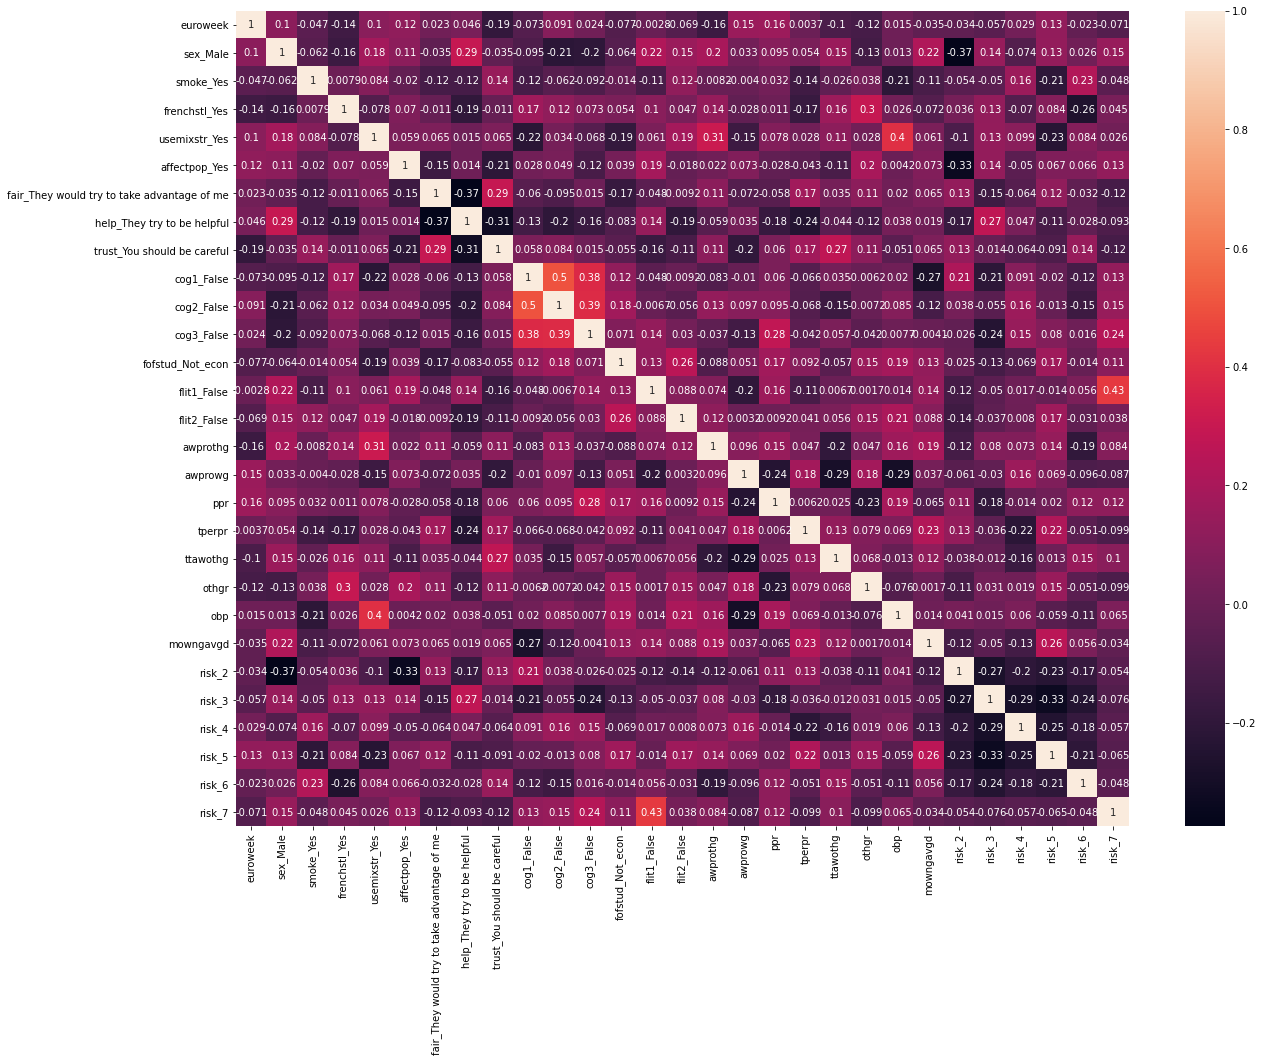

In [11]:
# Invetsigating the data
import matplotlib.pyplot as plt
import seaborn as sns

col = list(data.columns)
col.remove('cump')
col.remove('mepier')
col.remove('mothgavgd')

plt.figure(figsize=(20,15))
sns.heatmap(data[col[1:]].corr(), annot=True)
plt.show()


data[col].to_pickle('quest_ansers_wra')